In [215]:
import pandas as pd
pd.set_option('display.max_columns', 50)  
pd.set_option('display.max_rows', 50)  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
%autosave 120

Autosaving every 120 seconds


In [216]:
survey = pd.read_csv("kaggle_survey_2021_responses.csv")
survey.shape

(25974, 369)

In [217]:
survey.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,...,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,C,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Google Cloud AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DataRobot AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# Introduction


This is an exploratory analysis of the 2021 Kaggle Data Science Survey. This was a survey done on the Kaggle website of those in the data science industry. An invitation to the survey was sent to all Kaggle members in late 2021. The survey can be found at https://www.kaggle.com/c/kaggle-survey-2021. This dataset contains 25,973 observations and 38 variables (questions). The purpose of this analysis is to do an exploratory analysis of the survey since I am looking to join the data science industry. In particular, I am interested in the answers to the questions about education, programming languages, industries, and BI tools. 

The first thing I did was a bit of data cleaning. Since I am going to be looking for a job in the US, I filtered the dataset to include only the observations where the country was the United States. I am also going to be looking for a job with the title of "data analyst" or "data scientist" most likely, so I filtered the results again to only include these job titles. The resulting dataframe only contained 699 observations. This subset is considerably smaller than the original dataset, but still large enough to get some useful information from an exploratory analysis. 

In [218]:
# Deleting first row 
survey_mod = survey.iloc[1:,:]
survey_mod.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,...,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,C,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Google Cloud AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DataRobot AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN,Python,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
survey_mod.shape

(25973, 369)

In [219]:
# Pulling out country of USA and jobs of Data Scientist/Data Analyst only
survey_mod.Q3.value_counts()

India                       7434
United States of America    2650
Other                       1270
Japan                        921
China                        814
                            ... 
Kazakhstan                    45
Norway                        45
Algeria                       44
Ethiopia                      43
Iraq                          43
Name: Q3, Length: 66, dtype: int64

In [220]:
survey_mod.Q5.value_counts()

Student                         6804
Data Scientist                  3616
Software Engineer               2449
Other                           2393
Data Analyst                    2301
Currently not employed          1986
Research Scientist              1538
Machine Learning Engineer       1499
Business Analyst                 968
Program/Project Manager          849
Data Engineer                    668
Product Manager                  319
Statistician                     313
DBA/Database Engineer            171
Developer Relations/Advocacy      99
Name: Q5, dtype: int64

In [221]:
survey_mod2 = survey_mod[(survey_mod['Q3'] == "United States of America")] 
survey_mod2.shape

(2650, 369)

In [222]:
survey_mod2 = survey_mod2[(survey_mod.Q5 == "Data Scientist") | (survey_mod.Q5 == "Data Analyst")] 
survey_mod2.shape

# Alternative method
#filter1 = survey_mod["Q3"].isin(["United States of America"])
#filter2 = survey_mod["Q5"].isin(["Data Scientist", "Data Analyst"])
#survey_mod[filter1 & filter2].shape

(699, 369)

In [223]:
survey_mod2

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,...,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
33,171,22-24,Nonbinary,United States of America,Some college/university study without earning ...,Data Analyst,< 1 years,NaN,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,NaN,RStudio,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,557,30-34,Woman,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,508,25-29,Man,United States of America,Master’s degree,Data Scientist,1-3 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
108,728,55-59,Man,United States of America,Master’s degree,Data Scientist,20+ years,Python,R,SQL,NaN,NaN,NaN,Javascript,NaN,NaN,Bash,NaN,NaN,NaN,Python,NaN,RStudio,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,744,70+,Woman,United States of America,Master’s degree,Data Analyst,20+ years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25830,1721,30-34,Man,United States of America,Master’s degree,Data Analyst,1-3 years,NaN,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Google Cloud AutoML,NaN,Databricks AutoML,DataRobot AutoML,Amazon Sagemaker Autopilot,Azure Automated Machine Learning,NaN,NaN,NaN,Weights & Biases,NaN,NaN,NaN,NaN,Polyaxon,NaN,NaN,NaN,NaN,NaN
25836,439,35-39,Prefer not to say,United States of America,Master’s degree,Data Scientist,10-20 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25911,1127,55-59,Man,United States of America,Doctoral degree,Data Scientist,20+ years,NaN,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,NaN,RStudio,NaN,NaN,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MLflow,NaN,NaN
25930,4763,25-29,Man,United States of America,Doctoral degree,Data Scientist,1-3 years,Python,NaN,NaN,C,C++,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN,Python,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Getting % of null values for each question
survey_mod2.isnull().sum()/survey_mod.shape[0]

Time from Start to Finish (seconds)    0.000000
Q1                                     0.000000
Q2                                     0.000000
Q3                                     0.000000
Q4                                     0.000000
Q5                                     0.000000
Q6                                     0.000000
Q7_Part_1                              0.004081
Q7_Part_2                              0.015170
Q7_Part_3                              0.007354
Q7_Part_4                              0.026143
Q7_Part_5                              0.025295
Q7_Part_6                              0.025373
Q7_Part_7                              0.024718
Q7_Part_8                              0.026566
Q7_Part_9                              0.026720
Q7_Part_10                             0.022793
Q7_Part_11                             0.024910
Q7_Part_12                             0.026528
Q7_OTHER                               0.024294
Q8                                     0

# Education


The first question I wanted to analyze was about education. I was curious as to what is the educational background of data analysts and scientists in the US. In particular, I was wondering if they generally had a master's degree, a bachelor's degree, or perhaps just some professional certificates. 

In [224]:
survey_mod2["Q4"].value_counts()

Master’s degree                                                      391
Bachelor’s degree                                                    140
Doctoral degree                                                      130
Some college/university study without earning a bachelor’s degree     22
Professional doctorate                                                10
I prefer not to answer                                                 4
No formal education past high school                                   2
Name: Q4, dtype: int64

In [225]:
# Rename to "Some college" for graph
survey_mod2.loc[(survey_mod2.Q4 == 'Some college/university study without earning a bachelor’s degree'),'Q4'] = 'Some college'
survey_mod2["Q4"].value_counts()

Master’s degree                         391
Bachelor’s degree                       140
Doctoral degree                         130
Some college                             22
Professional doctorate                   10
I prefer not to answer                    4
No formal education past high school      2
Name: Q4, dtype: int64

In [226]:
# Filter out all degrees not in the top 4 for better visual
survey_mod_edplt = survey_mod2[(survey_mod['Q4'] != "Professional doctorate") & (survey_mod['Q4'] != "I prefer not to answer") 
& (survey_mod['Q4'] != "No formal education past high school")]
survey_mod_edplt["Q4"].value_counts()

Master’s degree      391
Bachelor’s degree    140
Doctoral degree      130
Some college          22
Name: Q4, dtype: int64

In [227]:
# Creating df of value_counts
survey_mod_edplt2 = survey_mod_edplt["Q4"].value_counts(normalize=True).to_frame()
survey_mod_edplt2["Q4"] = 100 * survey_mod_edplt2["Q4"]
survey_mod_edplt2

,Q4
Master’s degree,57.247438
Bachelor’s degree,20.497804
Doctoral degree,19.033675
Some college,3.221083


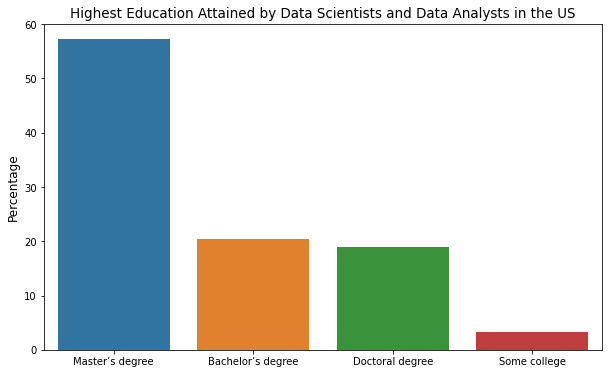

In [242]:
# Exploring Education(4)
plt.figure(figsize=(10,6))
plt.title ("Highest Education Attained by Data Scientists and Data Analysts in the US", fontsize = 13.5)
sb.barplot(x = survey_mod_edplt2.index, y = survey_mod_edplt2['Q4'])
plt.ylabel("Percentage", fontsize = 12)
plt.show()

As this bar graph shows, the majority of data scientists/analysts had a Master's degree (57%) and over three-fourths had a graduate degree of some kind (master's or doctorate). Only 3% of respondents hadn't graduated college. It appears as if a Bachelor's degree is the minimum requirement to get a data scientist/analyst position and a graduate degree is the best way to go. It would have been interesting to know what the majors of the respondents were, but this question wasn't asked. 

# Programming Languages

The next question I wanted to explore was programming languages. I wanted to see which programming languages were most often used on a regular basis by data analysts and data scientists in the US. This was question seven in the survey. The next question asked which programming language would the respondent recommend a prospective data scientist or analyst to learn first. I wanted to explore this question as well. 

In [243]:
# Exploring Programming Languages (7/8)
# survey_mod2 is base dataset
survey_mod2.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,...,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
33,171,22-24,Nonbinary,United States of America,Some college,Data Analyst,< 1 years,NaN,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,NaN,RStudio,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,557,30-34,Woman,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,508,25-29,Man,United States of America,Master’s degree,Data Scientist,1-3 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
108,728,55-59,Man,United States of America,Master’s degree,Data Scientist,20+ years,Python,R,SQL,NaN,NaN,NaN,Javascript,NaN,NaN,Bash,NaN,NaN,NaN,Python,NaN,RStudio,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,744,70+,Woman,United States of America,Master’s degree,Data Analyst,20+ years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [244]:
# Pulling out question 7
Q7 = survey_mod2.loc[:,survey_mod2.columns.str.startswith('Q7')]
Q7.head()

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
33,NaN,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,Python,R,SQL,NaN,NaN,NaN,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
151,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
# Changing column names
Q7.columns = list(Q7.mode().values)
Q7.head()

,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
33,NaN,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,Python,R,SQL,NaN,NaN,NaN,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
151,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [247]:
# Getting percentages of each language
Q7_sums = Q7.count().reset_index()
Q7_sums[0] = Q7_sums[0]/699 * 100
Q7_sums

,level_0,0
0,Python,84.835479
1,R,43.633763
2,SQL,72.675250
3,C,2.861230
4,C++,6.008584
5,Java,5.722461
6,Javascript,8.154506
7,Julia,1.287554
8,Swift,0.715308
9,Bash,15.307582


In [248]:
# Taking 'other' out
Q7_sums2 = Q7_sums.iloc[0:12,:]
Q7_sums2

,level_0,0
0,Python,84.835479
1,R,43.633763
2,SQL,72.675250
3,C,2.861230
4,C++,6.008584
5,Java,5.722461
6,Javascript,8.154506
7,Julia,1.287554
8,Swift,0.715308
9,Bash,15.307582


In [249]:
# Renaming columns before making bargraph
Q7_sums2.rename(columns = {'level_0': 'Language', 0: 'Percentage'}, inplace=True)
Q7_sums2

,Language,Percentage
0,Python,84.835479
1,R,43.633763
2,SQL,72.675250
3,C,2.861230
4,C++,6.008584
5,Java,5.722461
6,Javascript,8.154506
7,Julia,1.287554
8,Swift,0.715308
9,Bash,15.307582


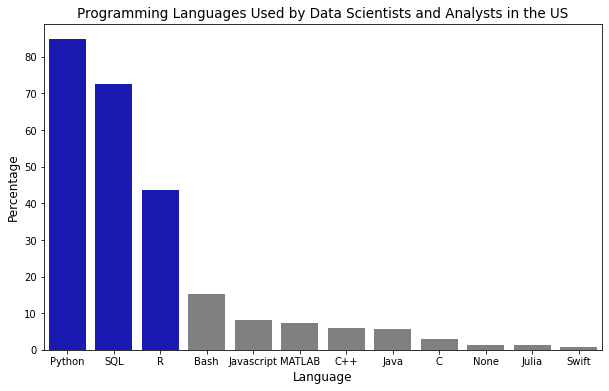

In [259]:
# Graph highlighting the top 3
plt.figure(figsize=(10,6))
plt.title ("Programming Languages Used by Data Scientists and Analysts in the US", fontsize = 13.5)
bar_clr = ['grey' if (x < 30) else 'mediumblue' for x in Q7_sums2['Percentage']] # Highlighting top 3
Q7_graph = sb.barplot(x = "Language", y = "Percentage", data = Q7_sums2, palette=bar_clr,
             order = Q7_sums2.sort_values("Percentage", ascending = False).Language)
Q7_graph.set_xlabel("Language", fontsize = 12)
Q7_graph.set_ylabel("Percentage", fontsize = 12)
plt.show()

In [258]:
# Pulling out Q8 and summing responses
Q8_sums = survey_mod2['Q8'].value_counts(normalize=True).to_frame()
Q8_sums.rename(columns = {"Q8": "Percentage"}, inplace = True)
Q8_sums["Percentage"] = Q8_sums["Percentage"] * 100
Q8_sums

,Percentage
Python,72.058824
SQL,13.235294
R,11.470588
Julia,0.735294
C++,0.441176
None,0.441176
Other,0.441176
C,0.441176
MATLAB,0.294118
Bash,0.294118


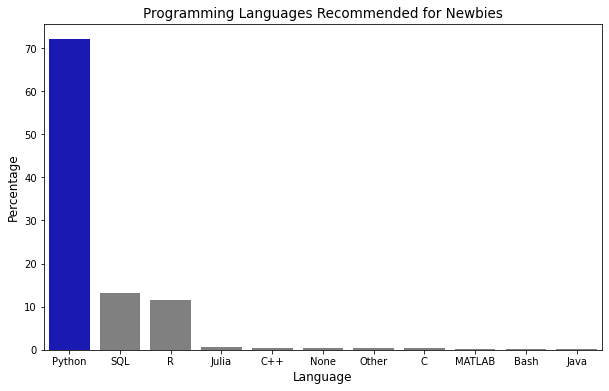

In [262]:
# Graph of question 8
plt.figure(figsize=(10,6))
plt.title ("Programming Languages Recommended for Newbies", fontsize = 13.5)
bar_clr = ['grey' if (x < 30) else 'mediumblue' for x in Q8_sums['Percentage']] # Highlighting top 3
Q8_graph = sb.barplot(x = Q8_sums.index, y = "Percentage", data = Q8_sums, palette=bar_clr)
plt.xlabel("Language", fontsize = 12)
Q8_graph.set_ylabel("Percentage", fontsize = 12)
plt.show()

There are three programming lanaguages that data scientists and analysts in this survey use on a regular basis: *python*, *SQL*, and *R*. Python and SQL are used on a regular basis by the majority of respondents, while R is used on a regular basis by nearly half of the respondents. However, thre is one clear winner when it comes to which one is recommended for aspiring data scientists/analysts to learn first. Nearly 70% of respondents in the survey answered Python to this question, while SQL and R each only represented 10% of the answers. The takeaway here seems to be that someone who wants to get into the data science/analyst field needs to be skilled in at least one of the top 3 programming languages, and the most important one according to the respondents to this survey is python. 

## Data Visualization Tools

The next question I wanted to explore was about data visualization tools. This question asked what data visualization tools were used on a regular basis by those who answered the survey. This question was similar to question 7 in that respondents could give multiple answers to the question. I expected the top 3 visualization tools to be *seaborn*, *matplotlib*, and *ggplot* but didn't know what order they would be in. 

In [263]:
# Exploring Data Vis Tools (14)
Q14 = survey_mod2.loc[:,survey_mod2.columns.str.startswith('Q14')]
# Changing names of columns to the correct tool
Q14.columns = list(Q14.mode().values)
Q14.head()

,Matplotlib,Seaborn,Plotly / Plotly Express,Ggplot / ggplot2,Shiny,D3 js,Altair,Bokeh,Geoplotlib,Leaflet / Folium,None,Other
33,NaN,NaN,NaN,Ggplot / ggplot2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,Matplotlib,Seaborn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,Matplotlib,Seaborn,Plotly / Plotly Express,NaN,NaN,NaN,NaN,NaN,NaN,Leaflet / Folium,NaN,NaN
108,NaN,Seaborn,NaN,Ggplot / ggplot2,Shiny,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,Matplotlib,Seaborn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [264]:
# Getting percentages of each visualization tool
Q14_sums = Q14.count().reset_index()
Q14_sums[0] = Q14_sums[0]/699 * 100
Q14_sums

,level_0,0
0,Matplotlib,65.951359
1,Seaborn,53.791130
2,Plotly / Plotly Express,35.479256
3,Ggplot / ggplot2,41.058655
4,Shiny,17.024320
5,D3 js,5.579399
6,Altair,2.432046
7,Bokeh,8.726753
8,Geoplotlib,5.293276
9,Leaflet / Folium,6.151645


In [265]:
# Taking 'other' out
Q14_sums2 = Q14_sums.iloc[0:11,:]
Q14_sums2

,level_0,0
0,Matplotlib,65.951359
1,Seaborn,53.791130
2,Plotly / Plotly Express,35.479256
3,Ggplot / ggplot2,41.058655
4,Shiny,17.024320
5,D3 js,5.579399
6,Altair,2.432046
7,Bokeh,8.726753
8,Geoplotlib,5.293276
9,Leaflet / Folium,6.151645


In [266]:
# Renaming columns 
Q14_sums2.rename(columns = {'level_0': 'Vis_Tool', 0: 'Percentage'}, inplace=True)
Q14_sums2

,Vis_Tool,Percentage
0,Matplotlib,65.951359
1,Seaborn,53.791130
2,Plotly / Plotly Express,35.479256
3,Ggplot / ggplot2,41.058655
4,Shiny,17.024320
5,D3 js,5.579399
6,Altair,2.432046
7,Bokeh,8.726753
8,Geoplotlib,5.293276
9,Leaflet / Folium,6.151645


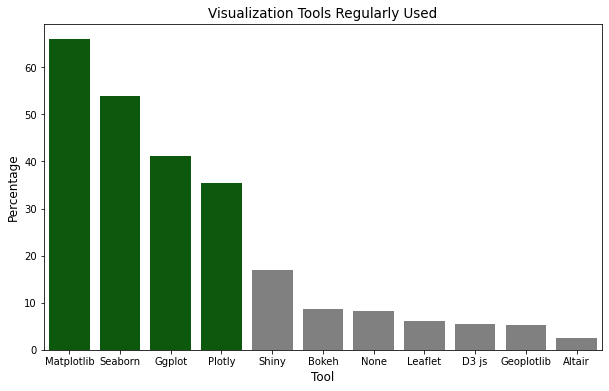

In [272]:
# Graph of vis tools
plt.figure(figsize=(10,6))
plt.title ("Visualization Tools Regularly Used", fontsize = 13.5)
bar_clr = ['grey' if (x < 30) else 'darkgreen' for x in Q14_sums2['Percentage']] # Highlighting top 3
vis_graph = sb.barplot(x = Q14_sums2.Vis_Tool, y = "Percentage", data = Q14_sums2, palette=bar_clr,
           order = Q14_sums2.sort_values("Percentage", ascending = False).Vis_Tool)
vis_graph.set_xticklabels(['Matplotlib', 'Seaborn', 'Ggplot', 'Plotly', 'Shiny', 'Bokeh', 'None', 'Leaflet',
                    'D3 js', 'Geoplotlib', 'Altair']) # Manually shortening names
vis_graph.set_ylabel("Percentage", fontsize = 12)
plt.xlabel("Tool", fontsize = 12)
plt.show()

The four main visualization tools used by data scientists/analysts in this survey were *matplotlib*, *seaborn*, *ggplot*, and *plotly*. Matplotlib and seaborn were used by the majority of respondents, while ggplot and plotly were used by about 40% of the respondents. All other visualization tools were used by less than 20% of those who answered the survey. So it appears that an aspiring data analyst or scientist needs to learn at least one of these top four to be career ready. 

## Industry and Company Size

The next two questions I wanted to focus on were type of industry and company size of the data scientists/analysts that answered this survey. I expected technology companies and perhaps insurance companies to be near the top in the industry category and I also thought that most data scientists/analysts probably worked for large companies. 

In [275]:
# Pulling out Q20 and summing responses
Q20_sums = survey_mod2['Q20'].value_counts(normalize=True).to_frame()
Q20_sums.rename(columns = {"Q20": "Percentage"}, inplace = True)
Q20_sums["Percentage"] = Q20_sums["Percentage"] * 100
Q20_sums

,Percentage
Computers/Technology,18.898810
Accounting/Finance,11.904762
Medical/Pharmaceutical,9.821429
Academics/Education,9.523810
Other,7.589286
Government/Public Service,5.357143
Insurance/Risk Assessment,4.910714
Retail/Sales,4.613095
Online Service/Internet-based Services,4.166667
Manufacturing/Fabrication,4.017857


In [274]:
# Only getting top 8 to include in bar graph
Q20_sums_8 = Q20_sums.iloc[0:8]
Q20_sums_8

,Percentage
Computers/Technology,18.898810
Accounting/Finance,11.904762
Medical/Pharmaceutical,9.821429
Academics/Education,9.523810
Other,7.589286
Government/Public Service,5.357143
Insurance/Risk Assessment,4.910714
Retail/Sales,4.613095


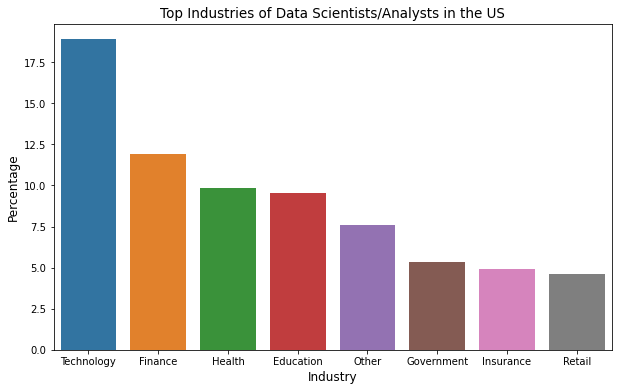

In [280]:
# Graph of Industries
plt.figure(figsize=(10,6))
plt.title ("Top Industries of Data Scientists/Analysts in the US", fontsize = 13.5)
ind_graph = sb.barplot(x = Q20_sums_8.index, y = "Percentage", data = Q20_sums_8)
ind_graph.set_xticklabels(['Technology', 'Finance', 'Health', 'Education', 'Other', 'Government', 'Insurance',
                           'Retail'])
ind_graph.set_ylabel("Percentage", fontsize = 12)
plt.xlabel("Industry", fontsize = 12)
plt.show()

In [281]:
# Company Size
Q21_sums = survey_mod2['Q21'].value_counts(normalize=True).to_frame()
Q21_sums.rename(columns = {"Q21": "Percentage"}, inplace = True)
Q21_sums["Percentage"] = Q21_sums["Percentage"] * 100
Q21_sums

,Percentage
"10,000 or more employees",32.238806
"1000-9,999 employees",21.791045
0-49 employees,17.462687
250-999 employees,14.328358
50-249 employees,14.179104


In [282]:
# Changing x axis order from largest to smallest
order = ['10,000 or more employees', '1000-9,999 employees', '250-999 employees', 
         '50-249 employees', '0-49 employees']

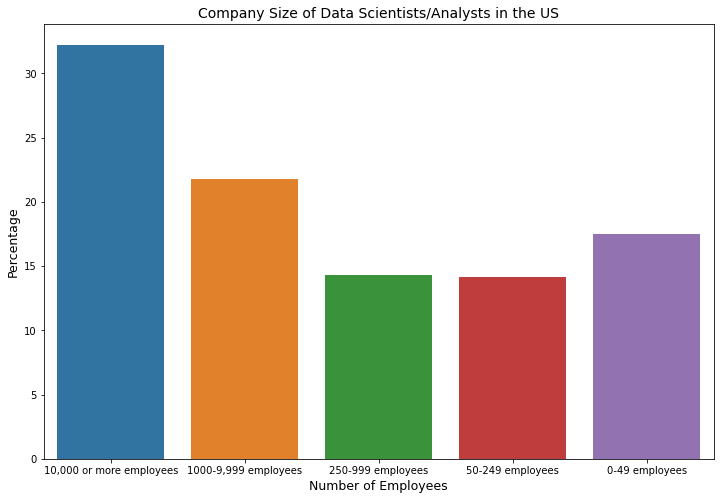

In [294]:
# Graph of company size
plt.figure(figsize=(12,8))
plt.title ("Company Size of Data Scientists/Analysts in the US", fontsize = 14)
Q21_graph = sb.barplot(x = Q21_sums.index, y = "Percentage", data = Q21_sums, order = order) # Changing the order
Q21_graph.set_ylabel("Percentage", fontsize = 12.5)
plt.xlabel("Number of Employees", fontsize = 12.5)
plt.show()

This analysis shows that data scientists and analysts works in a variety of industries. Unsurprisingly, technology is the most common industry, but other industries such as healthcare, finance, and education are not that far behind. This was mostly what I expected, except that I was a bit surprised that education was one of the top sectors that data scientists/analysts worked in. The bar graph above also shows that these jobs are found in companies of every size. Nearly one-third of repsondents worked in huge companies of at least 10,000 or more employees and over half of respondents worked in companies with 1,000 or more employees. However, nearly 20% worked in very small companies with fewer than 50 employees and almost half (46%) worked in small to medium sized companies who had fewer than 1,000 employees.  

## BI Tools

The last question I wanted to explore was which BI tools were often used by those who currently work as data scientists or analysts. Currently, I am learning Tableau, and I was curious whether Tableau or Power BI is used more often by those who currently have an analytics job. In addition, I wanted to know how common it was for other BI Tools, besides Tableau or Power BI, to be used on a regular basis. 

In [286]:
# Exploring BI Tools (35)
Q35_sums = survey_mod2['Q35'].value_counts(normalize=True).to_frame()
Q35_sums.rename(columns = {"Q35": "Percentage"}, inplace = True)
Q35_sums["Percentage"] = Q35_sums["Percentage"] * 100
Q35_sums

,Percentage
Tableau,45.925926
Microsoft Power BI,21.481481
Google Data Studio,7.407407
Alteryx,5.925926
Other,5.185185
Qlik,2.962963
Salesforce,2.222222
Looker,1.481481
Microsoft Azure Synapse,1.481481
TIBCO Spotfire,1.481481


In [287]:
# Making a new df manually/If there were more categories need to manipulate this data at beginning
data = [['Tableau', 45.93], ['Power BI', 21.48], ['Other', 32.59]]
Q35_sums2 = pd.DataFrame(data, columns = ['Tool', 'Percentage'])
Q35_sums2      

,Tool,Percentage
0,Tableau,45.93
1,Power BI,21.48
2,Other,32.59


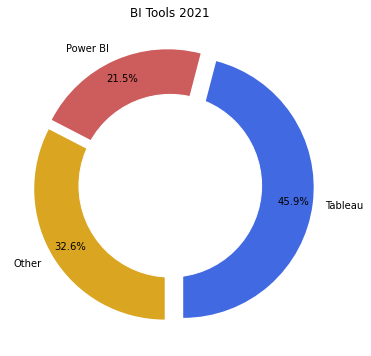

In [293]:
# Donut Chart of BI Tools
plt.figure(figsize=(10,6))
circle = plt.Circle( (0,0), 0.7, color='white') # creating hole in middle
explode = (0.10, 0.05, 0.05) # separation in slices
colors = ['royalblue', 'indianred', 'goldenrod']
plt.pie(Q35_sums2['Percentage'], 
        labels=Q35_sums2['Tool'],
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode,
        colors = colors,
        startangle = 270)
# Adding circle to pie chart
fig = plt.gcf()
fig.gca().add_artist(circle)
  
plt.title('BI Tools 2021')
plt.show()

Tableau was the most common BI tool used in this survey. Nearly half of respondents answered that this was the BI tool they used the most often. This was more than twice the amount that said Power BI was the BI tool they used most regularly. This was a bit surprising since my impression was that Power BI had been gaining on Tableau as the go-to BI tool for analytics. But it seems that, at least in this survey, Tableau is the clear favorite among data scientists/analysts in the US. I am also a bit surprised that nearly a third of respondents said that neither Tableau nor Power BI was their BI tool of choice. To be fair, the tool with the third highest number of responses (Google Data Studio) only received 7.4% of the responses, which is far lower than Tableau (45.9%) and Power BI (21.5%). Yet it is significant that all other BI tools combined were favored by nearly one third of data scientists/analysts in this survey. 

## Conclusion

This analysis explored the Kaggle Data Science Survey that was conducted in 2021. Since I am interested in getting a data analyst/scientist position in the US, I filtered the survey data to only include those that were in the US who currently had one of these job titles. The data indicates that education is important for getting a job with the minimum required education being a bachelor's degree. However, a graduate degree would seem to open up more opportunites as a majority of those in the survey held either a master's degree or Phd. The survey also suggested that learning one of the three main programming languages (Python, R, SQL) would be beneficial with most respondents saying that Python was the most important of the three. Finally, learning either Tableau or Power BI would seem to be a good idea to be job ready. 

The data was not so clear about what types of industries a prospective data scientists/analyst should be looking to get into. The technology sector is an obvious choice, but healthcare, finance, and even education seem to have a large number of analytics positions as well. Similarly, there seems to be no clear answer about whether most data scientists/analysts work in large companies or small companies. Nearly half of respondents said they worked for a company with 1,000 or more employees, while nearly half stated that their company had fewer than 1,000 employees. 

This is an interesting data set, especially for someone who is looking to get into the analytics field, but there are a couple of big caveats to be aware of. First, this data set may *not* reflect the attitudes of all data scientists/analysts in the US. This was a survey sent specifically to Kaggle users, so the best we could say is that it represents the views of Kaggle users who are currently data scientists/analysts in the US. However, this claim turns out to be dubious because according to the documentation the survey was sent to all Kaggle users and everyone that filled out the survey was included in the data. This means that this is a *voluntary response sample* and not a random sample. Therefore, we cannot make any confident claims about either the opinions of data scientists/analysts in the US or about Kaggle users who hold those positions in the US based on this survey alone. 

